# Text Data analysis

a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [ ]:
IAddress = open('lincoln-last-speech.txt','r')
IAddress.read(70)

'We meet this evening, not in sorrow, but in gladness of heart. The eva'

b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [ ]:
vWord = []
with open('lincoln-last-speech.txt','r') as file:
    for line in file:
        for word in line.split():          
            vWord.append(word.lower())
print(vWord[:20])

['we', 'meet', 'this', 'evening,', 'not', 'in', 'sorrow,', 'but', 'in', 'gladness', 'of', 'heart.', 'the', 'evacuation', 'of', 'petersburg', 'and', 'richmond,', 'and', 'the']


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordtokenize')

[nltk_data] Error loading wordtokenize: Package 'wordtokenize' not
[nltk_data]     found in index


False

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.ection

In [ ]:
import nltk
from nltk.corpus import stopwords
sWord = stopwords.words('english')
print(sWord)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


#text = str(vWord)
text_tokens = word_tokenize(str(vWord))
clean_word= [word for word in text_tokens if not word in stopwords.words()]
print(clean_word[:20])

['[', "'we", "'", ',', "'meet", "'", ',', "'this", "'", ',', "'evening", ',', "'", ',', "'not", "'", ',', "'in", "'", ',']


h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

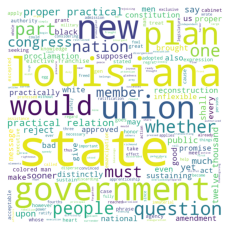

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(str(clean_word))
 
plt.figure(figsize = (3, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Answering Questions from Data

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('flights.txt')
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [ ]:
df.groupby('month')['arr_time'].value_counts(0)

month  arr_time
1      1649.0      49
       1008.0      47
       2037.0      47
       1028.0      44
       1859.0      44
                   ..
12     2350.0       1
       2354.0       1
       2355.0       1
       2357.0       1
       2359.0       1
Name: arr_time, Length: 4310, dtype: int64

b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [ ]:
df[(df['year'] == 2013) & (df['origin'] == 'JFK') | (df['origin'] == 'LGA')]['tailnum'].value_counts().nlargest(3)

N0EGMQ    126
N528MQ    113
N725MQ    111
Name: tailnum, dtype: int64

In [ ]:
df1 = pd.read_csv('planes.txt')
df1.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


How many planes have a missing date of manufacture

In [ ]:
df1['year'].value_counts(0).sum()

3252

What are the five most common manufacturers 

In [ ]:
df1['manufacturer'].value_counts().nlargest(5)

BOEING              1630
AIRBUS INDUSTRIE     400
BOMBARDIER INC       368
AIRBUS               336
EMBRAER              299
Name: manufacturer, dtype: int64

# Regular Expressions

a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [ ]:
import re
vText = ['google','logo','dig', 'blog', 'boogie']
re.sub('ogo|go|g|og', '.', string=str(vText))

"['..le', 'l.', 'di.', 'bl.', 'bo.ie']"

b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [ ]:
vPhone = ['874','6783','345345', '32120', '468349', '8149674']
re.sub(r'\b\d{5,6}\b', 'found', string=str(vPhone))

"['874', '6783', 'found', 'found', 'found', '8149674']"

c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [ ]:
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"
re.sub('[^a-zA-Z]', ' ' , string=str(myText))

' y o u  g o t t h e  so lu tio n c or r e ct'

d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [ ]:
myText = "Each of the three and four character words will be gone now"
re.sub(r'\b\w{3,4}\b', '...', string=str(myText))

'... of ... three ... ... character words ... be ... ...'

e) Extract all the three numbers embedded in the following text.

In [ ]:
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'
re.findall('[^a-z @A-Z]', string=str(bigText))

['2', '0', '1', '4', '9', '8', '9', '5', '0', '0']

f) Extract all the words between parenthesis from the following string text and count number of words.

In [ ]:
myText = 'The salries are reported (in millions) for every company.'
re.findall('\((.*)\)', string=str(myText))

['in millions']

g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [ ]:
myText = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]


h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [ ]:
myText = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'


i) Extract only the word in between pair of symbols $. Count number of words you have found between pairs of dollar sign $

In [ ]:
myText = 'Math symbols are $written$ in $between$ dollar $signs$'
re.findall('\$(.*?)\$', string=str(myText))

['written', 'between', 'signs']

j) Extract all the valid equations in the following text.

In [ ]:
myText = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'
re.findall('\d[\*|\+]\d=\d', string=str(myText))

['2+3=5', '2*3=6']